In [1]:
import pandas as pd
from CTL2.causal_tree_learn import CausalTree
from DGP.dgp2 import dgp2
from DGP.dgp1 import dgp1
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from CTL.causal_tree_learn import CausalTree as CT2
from random import random

In [2]:
def MC_trial_test(n, reps, nomin_test):
    ate1_true = []
    ate1_test = []
    ate0_true = []
    ate0_test = []
    
    for i in range(reps):
        np.random.seed()
        X, y = dgp2(n) #generate new data following dgp2
        x = X[:,0:4]
        treatment = X[:,4]
        y = y[:,0]
        #print(np.mean(y))
        x_train, x_test, y_train, y_test, treat_train, treat_test = train_test_split(x, y, treatment, test_size=0.5)
        #print(np.mean(y_train))
        # adaptive CT (Athey and Imbens, PNAS 2016)
        ctl = CausalTree(honest=True, weight=0.0, split_size=0.0) #which type of tree to call
        ctl.fit(x_train, y_train, treat_train, nomin_test = nomin_test) #select est size when fitting
        ctl.prune()
        ctl_predict = ctl.predict(x_test)

        #data = pd.DataFrame({'y': y_test, 'X1': x_test[:,0], 'X2': x_test[:,1], 'X3': x_test[:,2], 'X4': x_test[:,3], 'd':treat_test, 'tr1': ctl_predict, 'tr2': cthl_predict})
        x1 = x_test[:,0]
        ate1_true.append(np.mean(y_test[np.where((x1 > 0) & (treat_test == 1))]) - np.mean(y_test[np.where((x1 > 0) & (treat_test == 0))]))
        ate1_test.append(np.mean(ctl_predict[np.where(x1 > 0)]))
        ate0_true.append(np.mean(y_test[np.where((x1 < 0) & (treat_test == 1))]) - np.mean(y_test[np.where((x1 < 0) & (treat_test == 0))]))
        ate0_test.append(np.mean(ctl_predict[np.where(x1 < 0)]))

    #print('Test sample size: ' + str(nomin_test))
    #print(np.mean(ate1_true))
    #print(np.mean(ate1_test))
    #print(np.mean(ate1_control))
    #print(np.mean(ate0_true))
    #print(np.mean(ate0_test))
    #print(np.mean(ate0_control))
    
    return ate1_true, ate1_test, ate0_true, ate0_test

In [24]:
reps = 500
n = 250

test_sizes = [0.2, 0.35, 0.5]

ATE1 = []
ATE1_t = []
ATE0 = []
ATE0_t = []

ATES = [[],[],[],[]]
STDEV = [[],[],[],[]]


for size in test_sizes:
    nomin_test = size
    results = MC_trial_test(n, reps, nomin_test)
    k = 0
    for i in ATES:
        i.append(np.mean(results[k]))
        k = k + 1
    l = 0
    for j in STDEV:
        j.append(np.std(results[l]))
        l = l +1  

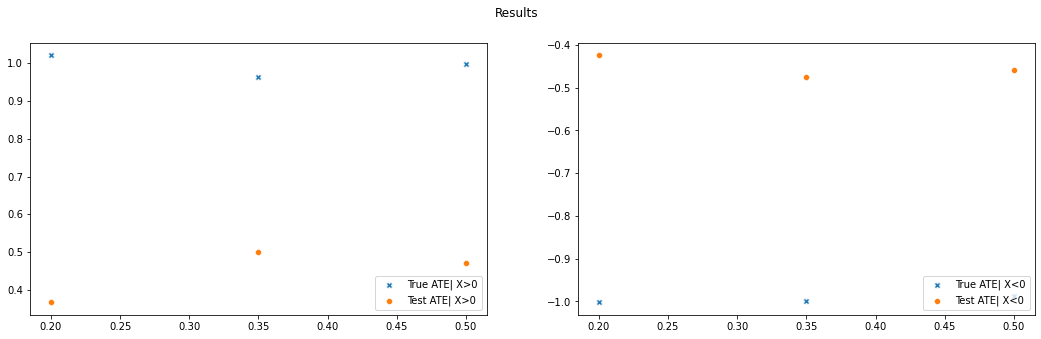

In [25]:
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(18, 5))
fig.suptitle('Results')

sns.scatterplot(ax=axes[0], x=test_sizes, y=ATES[0], marker="X")
sns.scatterplot(ax=axes[1], x=test_sizes, y=ATES[2], marker="X")

for i in range(0,1):
    sns.scatterplot(ax=axes[0], x=test_sizes, y=ATES[i+1])
    sns.scatterplot(ax=axes[1], x=test_sizes, y=ATES[i+3])
    
axes[0].legend(['True ATE| X>0', 'Test ATE| X>0', 'Control ATE| X>0'], loc='lower right')
axes[1].legend(['True ATE| X<0', 'Test ATE| X<0', 'Control ATE| X<0'], loc='lower right')

In [26]:
reps = 100
n = 1000

test_sizes = [0.2, 0.35, 0.5]

ATE1 = []
ATE1_t = []
ATE0 = []
ATE0_t = []

ATES = [[],[],[],[]]
STDEV = [[],[],[],[]]


for size in test_sizes:
    nomin_test = size
    results = MC_trial_test(n, reps, nomin_test)
    k = 0
    for i in ATES:
        i.append(np.mean(results[k]))
        k = k + 1
    l = 0
    for j in STDEV:
        j.append(np.std(results[l]))
        l = l +1  

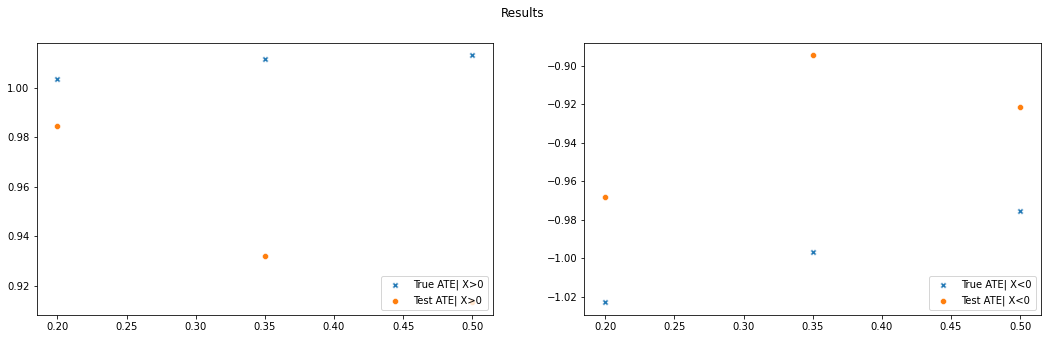

In [27]:
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(18, 5))
fig.suptitle('Results')

sns.scatterplot(ax=axes[0], x=test_sizes, y=ATES[0], marker="X")
sns.scatterplot(ax=axes[1], x=test_sizes, y=ATES[2], marker="X")

for i in range(0,1):
    sns.scatterplot(ax=axes[0], x=test_sizes, y=ATES[i+1])
    sns.scatterplot(ax=axes[1], x=test_sizes, y=ATES[i+3])
    
axes[0].legend(['True ATE| X>0', 'Test ATE| X>0', 'Control ATE| X>0'], loc='lower right')
axes[1].legend(['True ATE| X<0', 'Test ATE| X<0', 'Control ATE| X<0'], loc='lower right')

In [29]:
reps = 100
n = 1000

test_sizes = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

ATE1 = []
ATE1_t = []
ATE0 = []
ATE0_t = []

ATES = [[],[],[],[]]
STDEV = [[],[],[],[]]


for size in test_sizes:
    nomin_test = size
    results = MC_trial_test(n, reps, nomin_test)
    k = 0
    for i in ATES:
        i.append(np.mean(results[k]))
        k = k + 1
    l = 0
    for j in STDEV:
        j.append(np.std(results[l]))
        l = l +1  

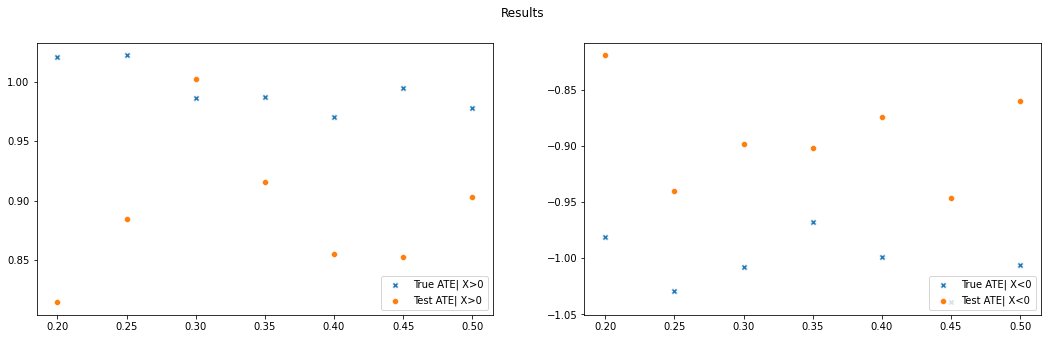

In [30]:
fig, axes = plt.subplots(1,2, figsize=(18, 5))
fig.suptitle('Results')

sns.scatterplot(ax=axes[0], x=test_sizes, y=ATES[0], marker="X")
sns.scatterplot(ax=axes[1], x=test_sizes, y=ATES[2], marker="X")

for i in range(0,1):
    sns.scatterplot(ax=axes[0], x=test_sizes, y=ATES[i+1])
    sns.scatterplot(ax=axes[1], x=test_sizes, y=ATES[i+3])
    
axes[0].legend(['True ATE| X>0', 'Test ATE| X>0', 'Control ATE| X>0'], loc='lower right')
axes[1].legend(['True ATE| X<0', 'Test ATE| X<0', 'Control ATE| X<0'], loc='lower right')

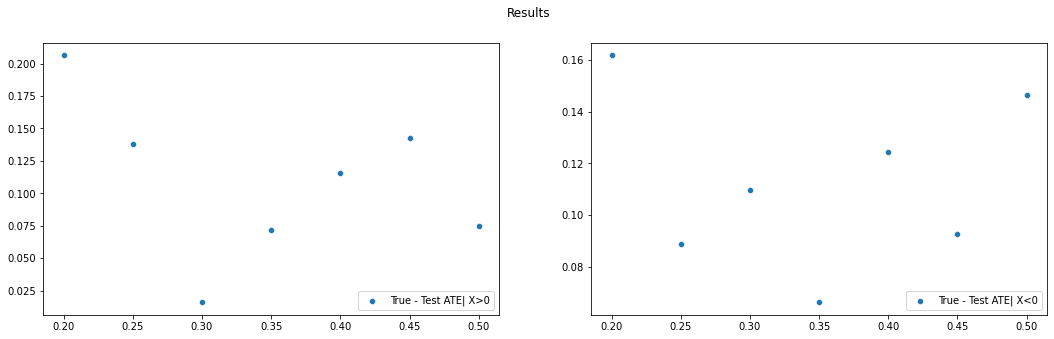

In [35]:
fig, axes = plt.subplots(1,2, figsize=(18, 5))
fig.suptitle('Results')

Y1 = abs(np.array(ATES[0]) - np.array(ATES[1]))
Y2 = abs(np.array(ATES[2]) - np.array(ATES[3]))

sns.scatterplot(ax=axes[0], x=test_sizes, y=Y1, marker="o")
sns.scatterplot(ax=axes[1], x=test_sizes, y=Y2, marker="o")


axes[0].legend(['True - Test ATE| X>0', 'True - Control ATE| X>0'], loc='lower right')
axes[1].legend(['True - Test ATE| X<0', 'True - Control ATE| X<0'], loc='lower right')